In [38]:
import pandas as pd
import matplotlib.pyplot as mp
import sklearn as sk
import numpy as np
from pandas .plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# IDEES/TODO
- choisir le modele de sklearn et tester plusieurs

- changer colonnes date par une colonne durée ou la rajouter
- retirer les colonnes : ID, store, PUID, DOID, FARE, PAYTYPE, TIP, TOLLS, IMPROVEMENT
- retirer les lignes avec des valeurs manquantes
- retirer les lignes avec des valeurs aberrantes
- retirer les lignes avec des valeurs négatives
- retirer les lignes avec des valeurs nulles
- diminuer le nombre de lignes ? 


https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf


In [39]:
data = pd.read_parquet("./yellow_tripdata_2022-11.parquet", engine="fastparquet")
print(data.shape)
data.head(5)


(3252717, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.6,1.0,N,151,151,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0
1,1,2022-11-01 00:39:43,2022-11-01 00:48:44,0.0,1.8,1.0,N,90,79,1,8.5,3.0,0.5,3.05,0.0,0.3,15.35,2.5,0.0
2,1,2022-11-01 00:55:01,2022-11-01 01:01:35,0.0,2.0,1.0,N,137,141,1,8.0,3.0,0.5,2.36,0.0,0.3,14.16,2.5,0.0
3,1,2022-11-01 00:24:49,2022-11-01 00:31:04,2.0,1.0,1.0,N,158,113,1,6.0,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
4,1,2022-11-01 00:37:32,2022-11-01 00:42:23,2.0,0.8,1.0,N,249,158,2,5.5,3.0,0.5,0.00,0.0,0.3,9.30,2.5,0.0


In [40]:
#describe with normal notation
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
VendorID,3252717.0,1.778041,0.447742,1.00,2.00,2.00,2.00,6.00
passenger_count,3130759.0,1.392939,0.933150,0.00,1.00,1.00,1.00,9.00
trip_distance,3252717.0,6.346792,654.688940,0.00,1.10,1.89,3.59,305756.36
RatecodeID,3130759.0,1.367043,5.203415,1.00,1.00,1.00,1.00,99.00
PULocationID,3252717.0,166.304893,64.684641,1.00,132.00,162.00,234.00,265.00
DOLocationID,3252717.0,163.840763,69.784166,1.00,114.00,162.00,234.00,265.00
payment_type,3252717.0,1.186218,0.543390,0.00,1.00,1.00,1.00,5.00
fare_amount,3252717.0,15.159421,14.564263,-1274.00,7.00,10.50,17.00,1274.00
extra,3252717.0,0.834000,1.152385,-5.50,0.00,0.50,1.00,14.35
mta_tax,3252717.0,0.486834,0.100948,-0.50,0.50,0.50,0.50,16.55


ValueError: hist method requires numerical or datetime columns, nothing to plot.

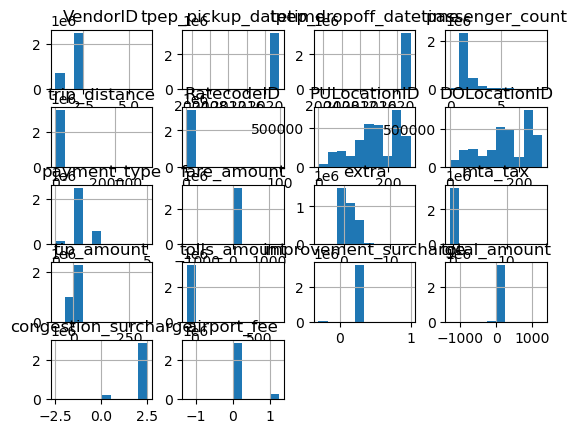

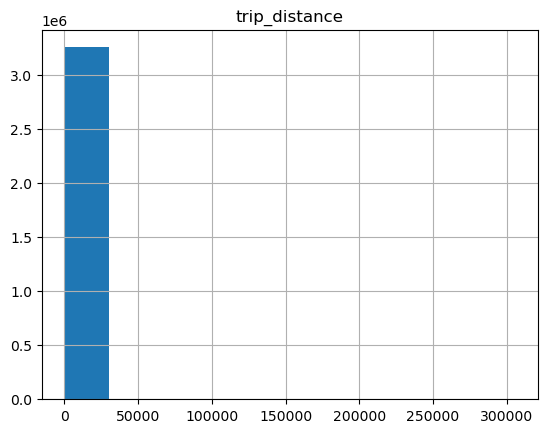

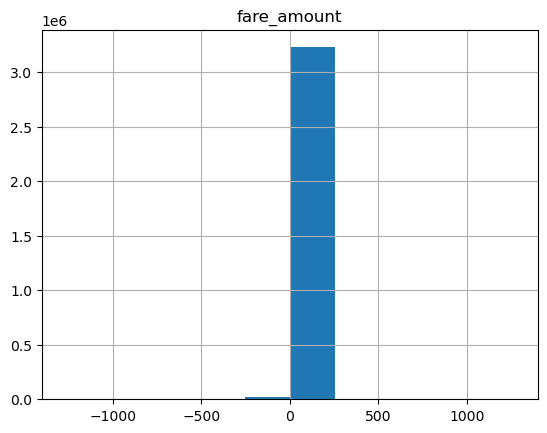

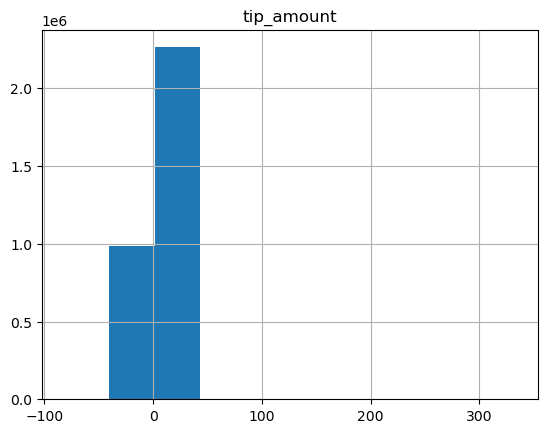

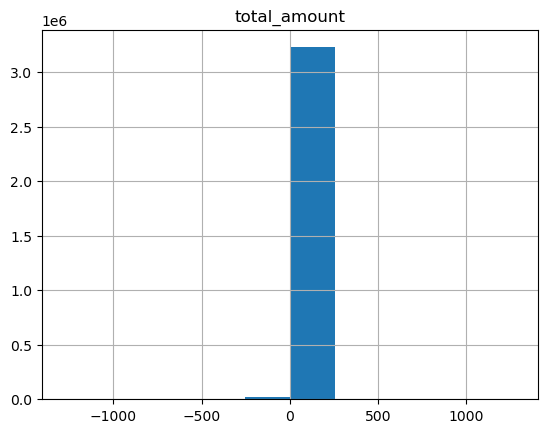

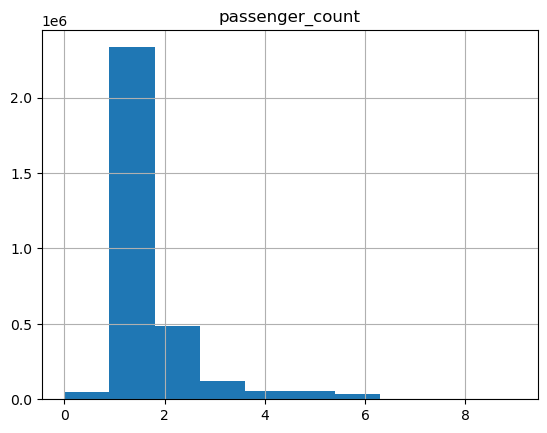

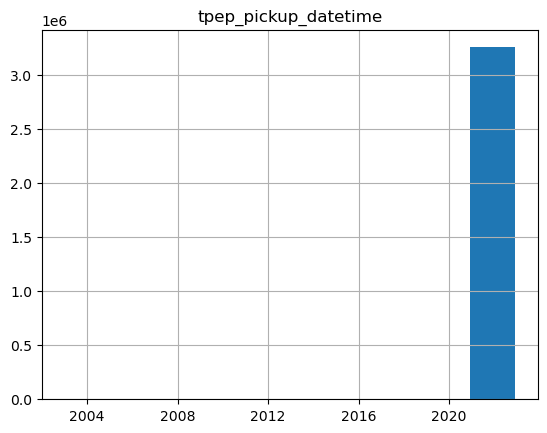

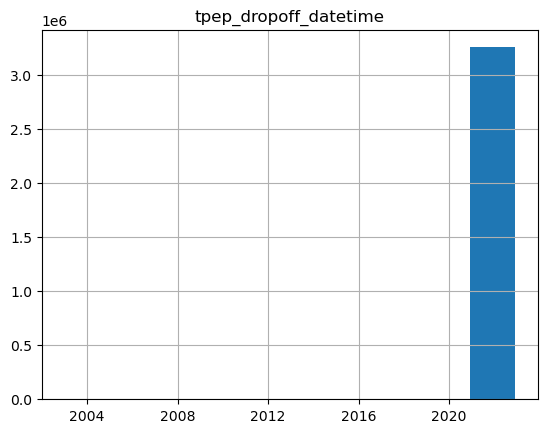

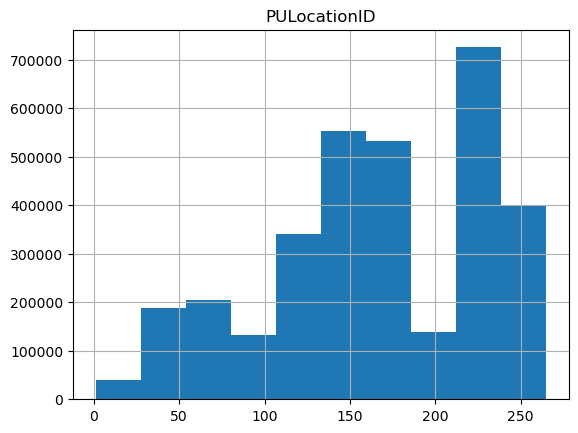

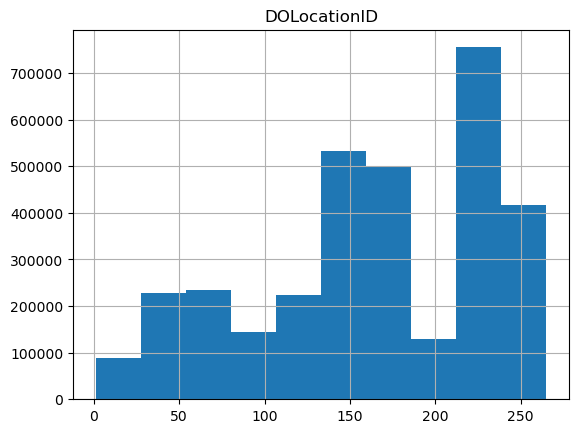

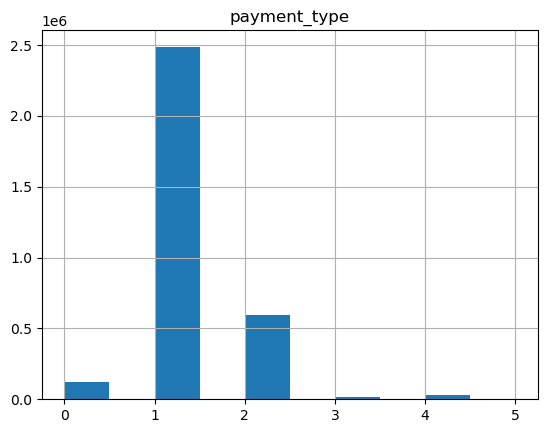

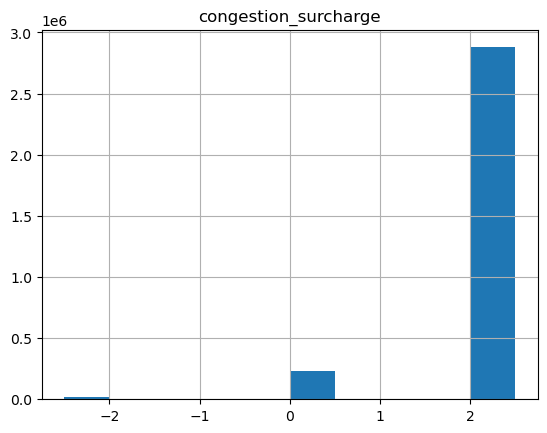

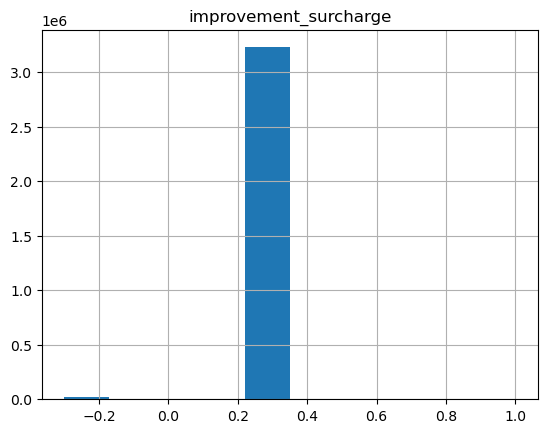

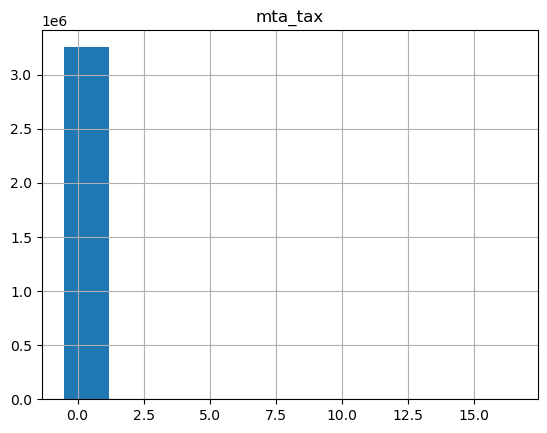

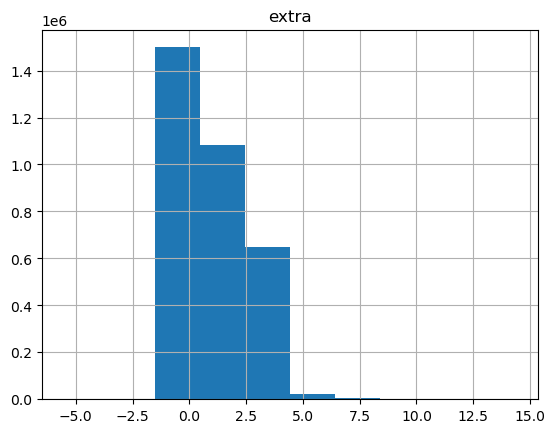

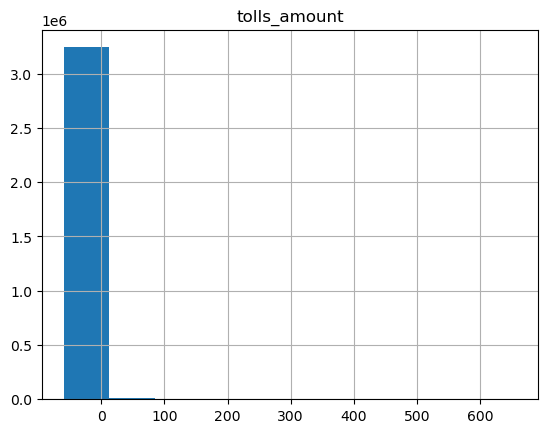

In [41]:

data.hist()
#split into 3 plots for better visualization

data.hist(column='trip_distance')
data.hist(column='fare_amount')
data.hist(column='tip_amount')
data.hist(column='total_amount')
data.hist(column='passenger_count')
data.hist(column='tpep_pickup_datetime')
data.hist(column='tpep_dropoff_datetime')
data.hist(column='PULocationID')
data.hist(column='DOLocationID')
data.hist(column='payment_type')
data.hist(column='congestion_surcharge')
data.hist(column='improvement_surcharge')
data.hist(column='mta_tax')
data.hist(column='extra')
data.hist(column='tolls_amount')
data.hist(column='store_and_fwd_flag')
data.hist(column='RatecodeID')
data.hist(column='VendorID')



mp.show()

In [ ]:
data.plot( subplots=True, layout=(3,3), sharex=False, sharey=False)
mp.figure( figsize=(100,100))
mp.show()
# TODO make readable

ValueError: Layout of 3x3 must be larger than required size 18

<Figure size 640x480 with 0 Axes>

In [42]:
# adapt data to be used in the model
data = data.drop(columns=['VendorID', 'store_and_fwd_flag', 'RatecodeID','PULocationID','DOLocationID', 'payment_type','fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge','airport_fee','tip_amount'])


In [45]:
data.head(5)
#change dates to duration and hour
for index, row in data.iterrows():
    start = row['tpep_pickup_datetime']
    end = row['tpep_dropoff_datetime']
    duration = end - start
    data.at[index, 'duration'] = duration.seconds
    data.at[index, 'hour'] = start.hour
    data = data.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
data.head(5)

KeyError: 'tpep_pickup_datetime'

In [17]:
#split data into train and test sets
array = data.values
#X is every column except 2 and 3
X = array[2:3]
#Y is column 2 and 3
Y = array[0:2]
Y = np.append(Y, array[4:])


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1)
print( array )

ValueError: Found input variables with inconsistent numbers of samples: [1, 61801585]

In [ ]:
# linear regression with only time and distance



model = (('LR', LinearRegression()))



In [ ]:
# linear regression with time hour and distance





In [ ]:
#linear regression with more parameters